<a href="https://colab.research.google.com/github/lalit-kumr/text_mining_nlp/blob/main/nlp_women_clothing_ecommerce10-sep-21-6-32-pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd


In [169]:
df = pd.read_excel('https://github.com/lalit-kumr/text_mining_nlp/blob/main/Womens%20Clothing%20Reviews%20Data.xlsx?raw=true')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


### Changing column names to lower case

In [170]:
df.columns  = ['product_id',
               'category',
               'sub_cat_1',
               'sub_cat_2',
               'location',
               'channel',
               'age',
               'review_title',
               'review_text',
               'rating',
               'recommend_flag']

### Missing value treatement

In [171]:
df.isna().sum()

product_id           0
category            14
sub_cat_1           14
sub_cat_2           14
location             0
channel              0
age                  0
review_title      3810
review_text        845
rating               0
recommend_flag       0
dtype: int64

In [172]:
df.dropna(inplace=True)

In [173]:
df.isna().sum()

product_id        0
category          0
sub_cat_1         0
sub_cat_2         0
location          0
channel           0
age               0
review_title      0
review_text       0
rating            0
recommend_flag    0
dtype: int64

## EDA

### plot of count of ratings

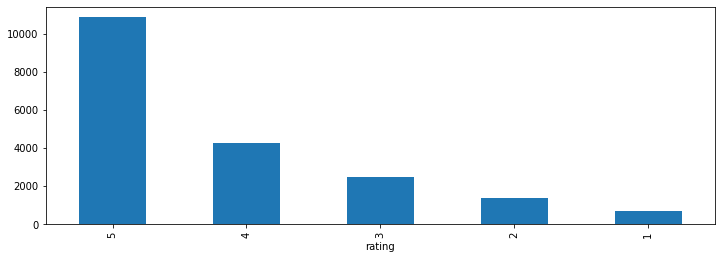

In [174]:
df.rating.value_counts().plot(kind='bar',figsize=(12,4),xlabel='rating')

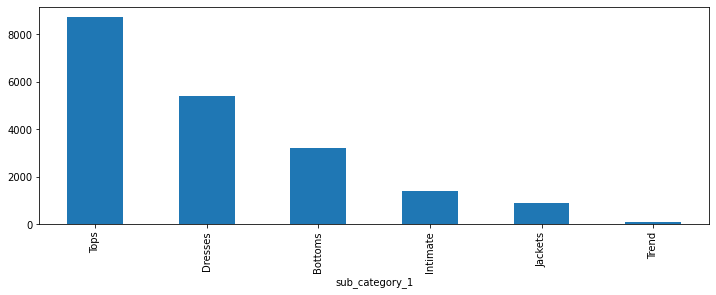

In [175]:
df.sub_cat_1.value_counts().plot(kind='bar',figsize=(12,4),xlabel='sub_category_1')

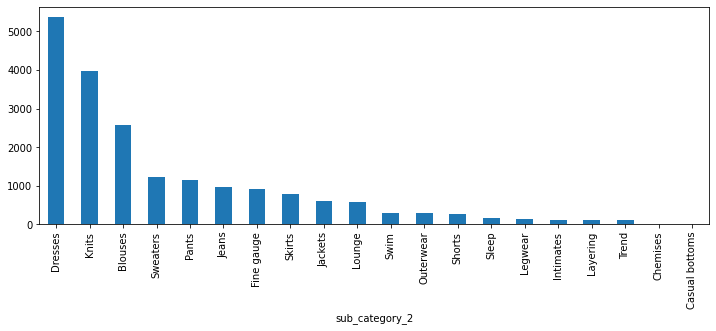

In [176]:
df.sub_cat_2.value_counts().plot(kind='bar',figsize=(12,4),xlabel='sub_category_2')

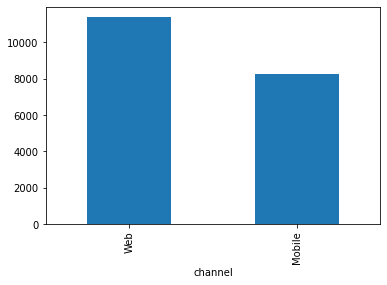

In [177]:
df.channel.value_counts().plot(kind='bar',xlabel='channel')

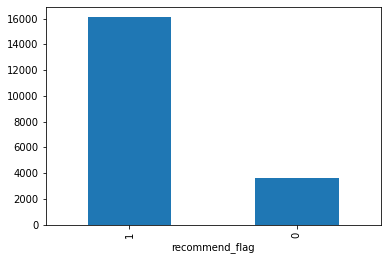

In [93]:
df.recommend_flag.value_counts().plot(kind='bar',xlabel='recommend_flag')

### plotting counts of each age group

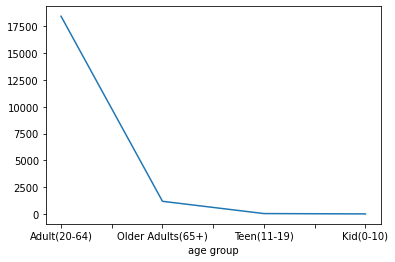

In [94]:

bins= [0,11,20,65,120]
labels = ['Kid(0-10)','Teen(11-19)','Adult(20-64)','Older Adults(65+)']
df['age_groups'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.age_groups.value_counts().plot(xlabel='age group')

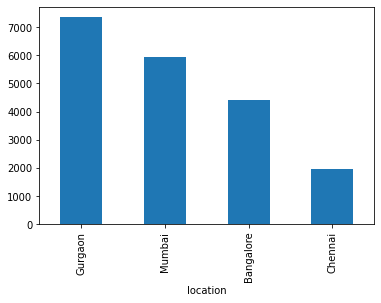

In [97]:
df.location.value_counts().plot(kind='bar',xlabel='location')

##Data cleaning

In [105]:
#changing text to lower case
df.review_text = df.review_text.apply(lambda x: x.lower())
df.review_title = df.review_title.apply(lambda x: x.lower())

In [163]:
#removing special characters
from string import punctuation

punc = punctuation


In [164]:
import re

def remove_punc(text):
  text  = "".join([char for char in text if char not in punc])
   
      
  

In [167]:
df['review_text'].apply(lambda x: remove_punc(x))

In [185]:
aa = df.review_text[3].split()

In [183]:
aa = [char for char in aa if char not in punc]

In [186]:
aa

['I',
 'love,',
 'love,',
 'love',
 'this',
 'jumpsuit.',
 "it's",
 'fun,',
 'flirty,',
 'and',
 'fabulous!',
 'every',
 'time',
 'i',
 'wear',
 'it,',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments!']